# Going Deeper #

In [4]:
# Housing prices in Boston from 1978.
# https://archive.ics.uci.edu/ml/datasets/Housing

# Format:
#    1.  Crime rate,
#    2.  Proportion of residential land
#    3.  Proportion of non-retail business
#    4.  Bounds river
#    5.  Nitric oxides concentration
#    6.  Average number of rooms
#    7.  Proportion of units built prior to 1940
#    8.  Weighted distances to five Boston employment centres
#    9.  Accessibility to radial highways
#    10. Property-tax rate
#    11. Pupil-teacher ratio
#    12. Proportion of blacks
#    13. Percentage of lower-status residents
#    14. Median value of homes
housing = readdlm("res/housing.tsv")

# Inputs, stored column-wise.
xs = housing[:, 1:13]'
# Normalise the data, often essential for regression problems.
xs = (xs .- mean(xs, 2))./std(xs, 2)
ys = housing[:, 14:14]' * 1_000

randomhouse = rand(1:size(xs, 2))
(randomhouse, xs[:, randomhouse], ys[randomhouse])

(232,[-0.366279,-0.48724,-0.71961,-0.272329,-0.437488,1.60452,0.295753,-0.0586703,-0.177944,-0.600682,-0.487557,0.213221,-1.03669],31700.0)

In [5]:
m = [
    # Weights.
    randn(1, size(xs, 1))/128,
    # Bias.
    0,
]
predict(m, xs)       = m[1]*xs .+ m[2]
objective(m, xs, ys) = mean((ys .- predict(m, xs)).^2./2)

predict(m, xs)[randomhouse]

0.0009296689019001637

In [6]:
objective(m, xs, ys)

2.960733177964726e8

In [7]:
using Knet

∇objective = grad(objective)

∇objective(m, xs[:, randomhouse], ys[randomhouse])

2-element Array{Any,1}:
       [11611.0 15445.5 … -6759.1 32863.1]
 -31700.0                                 

In [8]:
μ = 0.01

models = [m]

for _ in 1:1024
    ∇ = ∇objective(m, xs, ys)
    for i in 1:length(∇)
        m[i] -= μ.*∇[i]
    end
    push!(models, deepcopy(m))
end

objective(m, xs, ys)

1.1076978933543164e7

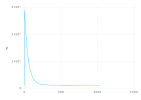

In [9]:
using Gadfly

plot(
    y = [objective(m, xs, ys) for m in models], Geom.line,
)

In [10]:
(predict(m, xs)[randomhouse], ys[randomhouse])

(33071.27581917898,31700.0)

In [11]:
labels = [
    "Crime rate",
    "Proportion of residential land",
    "Proportion of non-retail business",
    "Bounds river",
    "Nitric oxides concentration",
    "Average number of rooms",
    "Proportion of units built prior to 1940",
    "Weighted distances to five Boston employment centres",
    "Accessibility to radial highways",
    "Property-tax rate",
    "Pupil-teacher ratio",
    "Proportion of blacks",
    "Percentage of lower-status residents",
]
for (i, lbl) in enumerate(labels)
    @printf("%.4f\t%s\n", m[1][i], lbl)
end

-785.1893	Crime rate
819.5894	Proportion of residential land
-268.8872	Proportion of non-retail business
742.4685	Bounds river
-1593.8441	Nitric oxides concentration
2885.4861	Average number of rooms
-101.0977	Proportion of units built prior to 1940
-2760.0059	Weighted distances to five Boston employment centres
1479.5703	Accessibility to radial highways
-898.4205	Property-tax rate
-1957.0230	Pupil-teacher ratio
872.0446	Proportion of blacks
-3650.1245	Percentage of lower-status residents


In [29]:
m      = [
    # Weights.
    randn(64, size(xs, 1))/128,
    # Bias.
    0,
    randn(32, 64)/128,
    0,
    randn(1, 32)/128,
    0,
]
relu(x) = max(0, x)
function predict(m, xs)
    y′ = relu(m[1]*xs .+ m[2])
    for i in 3:2:length(m)
        y′ = m[i]*y′ .+ m[i + 1]
        if i < length(m) - 1
            y′ = relu(y′)
        end
    end
    y′
end

objective(m, xs, ys) = mean((ys .- predict(m, xs)).^2./2)
∇objective           = grad(objective)

for _ in 1:4096
    ∇ = ∇objective(m, xs, ys)
    for i in 1:length(∇)
        m[i] -= μ.*∇[i]
    end
    push!(models, deepcopy(m))
end

objective(m, xs, ys)

4.220977807808277e7

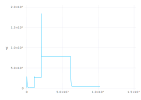

In [30]:
plot(
    y = [objective(m, xs, ys) for m in models], Geom.line,
)

In [31]:
(predict(m, xs)[randomhouse], ys[randomhouse])

(22532.806324110494,31700.0)

![Lego bricks](img/lego.jpg)

Source: [Wikipedia](https://commons.wikimedia.org/wiki/File:Lego_Color_Bricks.jpg)